In [1]:
# Dataframe and numeric manipulations
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Display preferences
pd.options.display.max_rows = 999

In [2]:
# Local module(s) to use
import wrangle as w

In [3]:
# Acquire and prepare (initially) the dataframe with our wrangle module
df = w.wrangle_1033()

In [4]:
import explore as e

In [5]:
e.ttest_by_State(df)

14506.052776636427
We reject the null hypothesis. MS mean of acquisitions is > than the mean of all acquisitions.
We reject the null hypothesis. NY mean of acquisitions is > than the mean of all acquisitions.
We reject the null hypothesis. TX mean of acquisitions is > than the mean of all acquisitions.
We reject the null hypothesis. OR mean of acquisitions is > than the mean of all acquisitions.
We reject the null hypothesis. NC mean of acquisitions is > than the mean of all acquisitions.
We reject the null hypothesis. NM mean of acquisitions is > than the mean of all acquisitions.
We reject the null hypothesis. WA mean of acquisitions is > than the mean of all acquisitions.
We reject the null hypothesis. NE mean of acquisitions is > than the mean of all acquisitions.
We reject the null hypothesis. FL mean of acquisitions is > than the mean of all acquisitions.
We reject the null hypothesis. NV mean of acquisitions is > than the mean of all acquisitions.
We reject the null hypothesis. 

In [6]:
df.head()

,State,Agency_Name,NSN,Item_Name,Quantity,UI,Acquisition_Value,DEMIL_Code,DEMIL_IC,Ship_Date,total_value
Ship_Date,,,,,,,,,,,
1990-05-03,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,1990-05-03,138.0
1990-05-03,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,1990-05-03,138.0
1990-05-03,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,1990-05-03,138.0
1990-05-03,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,1990-05-03,138.0
1990-05-03,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,1990-05-03,138.0


In [7]:
import datetime as dt

## Calculating Recency

In [8]:
df_recency = df.groupby(by='Agency_Name', as_index=False)['Ship_Date'].max()

In [9]:
df_recency.columns = ['Agency_Name', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()

In [10]:
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)
df_recency.head()

,Agency_Name,LastPurchaseDate,Recency
0,14TH JUDICIAL DIST DTF,1998-08-24,8438
1,18TH JUDICAL DTF,2011-10-20,3633
2,21ST JUDICIAL DISTRICT DTF,2010-08-31,4048
3,23RD JUDICIAL DISTRICT DTF,2021-08-10,51
4,24TH JUDICIAL DISTRICT DTF,2020-10-06,359


In [11]:
df_recency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5632 entries, 0 to 5631
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Agency_Name       5632 non-null   object        
 1   LastPurchaseDate  5632 non-null   datetime64[ns]
 2   Recency           5632 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 132.1+ KB


## Calculating Frequency

In [12]:
frequency_df = df.drop_duplicates().groupby(by=['Agency_Name'], as_index=False)['Ship_Date'].count()
frequency_df.columns = ['Agency_Name', 'Frequency']
frequency_df.head()

,Agency_Name,Frequency
0,14TH JUDICIAL DIST DTF,1
1,18TH JUDICAL DTF,3
2,21ST JUDICIAL DISTRICT DTF,6
3,23RD JUDICIAL DISTRICT DTF,7
4,24TH JUDICIAL DISTRICT DTF,2


In [13]:
frequency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5632 entries, 0 to 5631
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Agency_Name  5632 non-null   object
 1   Frequency    5632 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 88.1+ KB


## Calculating Monetary Value

In [14]:
df['Total'] = df['total_value']
monetary_df = df.groupby(by='Agency_Name', as_index=False)['Total'].sum()
monetary_df.columns = ['Agency_Name', 'Monetary']
monetary_df.head()

,Agency_Name,Monetary
0,14TH JUDICIAL DIST DTF,2994.00
1,18TH JUDICAL DTF,202121.81
2,21ST JUDICIAL DISTRICT DTF,44268.56
3,23RD JUDICIAL DISTRICT DTF,238904.80
4,24TH JUDICIAL DISTRICT DTF,702000.00


In [16]:
monetary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5632 entries, 0 to 5631
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Agency_Name  5632 non-null   object 
 1   Monetary     5632 non-null   float64
dtypes: float64(1), object(1)
memory usage: 88.1+ KB


## Merging our dataframes

In [17]:
rf_df = df_recency.merge(frequency_df, on='Agency_Name')
rfm_df = rf_df.merge(monetary_df, on='Agency_Name').drop(columns='LastPurchaseDate')
rfm_df.head()

,Agency_Name,Recency,Frequency,Monetary
0,14TH JUDICIAL DIST DTF,8438,1,2994.00
1,18TH JUDICAL DTF,3633,3,202121.81
2,21ST JUDICIAL DISTRICT DTF,4048,6,44268.56
3,23RD JUDICIAL DISTRICT DTF,51,7,238904.80
4,24TH JUDICIAL DISTRICT DTF,359,2,702000.00


In [18]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5632 entries, 0 to 5631
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Agency_Name  5632 non-null   object 
 1   Recency      5632 non-null   int64  
 2   Frequency    5632 non-null   int64  
 3   Monetary     5632 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 220.0+ KB


## Assigning ranks based on 'stats'

In [19]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

# normalizing the rank of the 'customers'
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm_df.head()

,Agency_Name,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,14TH JUDICIAL DIST DTF,8438,1,2994.00,2.905375,11.976207,11.976207
1,18TH JUDICAL DTF,3633,3,202121.81,27.187916,46.786222,46.786222
2,21ST JUDICIAL DISTRICT DTF,4048,6,44268.56,22.034651,68.670099,68.670099
3,23RD JUDICIAL DISTRICT DTF,51,7,238904.80,95.459796,72.567472,72.567472
4,24TH JUDICIAL DISTRICT DTF,359,2,702000.00,84.735673,32.279830,32.279830


## Calculating RFM score
Scale of 5
- .15 * Recency
- .28 * Frequency
- .57 * Monetary

In [20]:
rfm_df['RFM_Score'] = .15 *rfm_df['R_rank_norm'] + .28 * rfm_df['F_rank_norm'] + .57 * rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= .05
rfm_df = rfm_df.round(2)
rfm_df[['Agency_Name', 'RFM_Score']].head()

,Agency_Name,RFM_Score
0,14TH JUDICIAL DIST DTF,0.53
1,18TH JUDICAL DTF,2.19
2,21ST JUDICIAL DISTRICT DTF,3.08
3,23RD JUDICIAL DISTRICT DTF,3.80
4,24TH JUDICIAL DISTRICT DTF,2.01


## Rating customers based on RFM Score

In [21]:
rfm_df['Agency_Segment'] = np.where(rfm_df['RFM_Score'] > 4.5, "Top User", 
                                    (np.where(rfm_df['RFM_Score'] > 4, "High Use", 
                                             (np.where(rfm_df['RFM_Score'] > 3, "Medium Use",
                                                      (np.where(rfm_df['RFM_Score'] > 1.6, "Low Use", "Lowest Use")))))))
rfm_df[['Agency_Name', 'RFM_Score', 'Agency_Segment']].head(50)

,Agency_Name,RFM_Score,Agency_Segment
0,14TH JUDICIAL DIST DTF,0.53,Lowest Use
1,18TH JUDICAL DTF,2.19,Low Use
2,21ST JUDICIAL DISTRICT DTF,3.08,Medium Use
3,23RD JUDICIAL DISTRICT DTF,3.80,Medium Use
4,24TH JUDICIAL DISTRICT DTF,2.01,Low Use
5,3RD DISTRICT ATTY DTF,0.82,Lowest Use
6,8TH JUDICIAL DEPT OF CORRECTIONS,0.77,Lowest Use
7,ABBEVILLE COUNTY SHERIFF OFFICE,4.49,High Use
8,ABBEVILLE POLICE DEPARTMENT,1.95,Low Use
9,ABBEVILLE POLICE DEPT,4.26,High Use


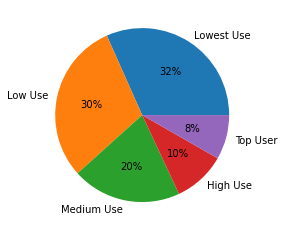

In [22]:
plt.pie(rfm_df.Agency_Segment.value_counts(),
       labels=rfm_df.Agency_Segment.value_counts().index,
       autopct='%.0f%%')
plt.show()

In [25]:
df_high = rfm_df[rfm_df.Agency_Segment == 'High Use']

In [45]:
df_high

,Agency_Name,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Agency_Segment
7,ABBEVILLE COUNTY SHERIFF OFFICE,28,17,284982.52,97.09,88.52,88.52,4.49,High Use
9,ABBEVILLE POLICE DEPT,1339,16,1020064.78,71.18,87.77,87.77,4.26,High Use
11,ABERDEEN POLICE DEPT,245,10,1806702.00,87.54,80.61,80.61,4.08,High Use
15,ABINGTON TOWNSHIP POLICE DEPT,128,15,778986.70,92.52,86.93,86.93,4.39,High Use
29,ADAMSVILLE POLICE DEPT,3257,21,86938.49,37.65,90.90,90.90,4.15,High Use
34,AIKEN COUNTY SHERIFF OFFICE,414,17,537608.23,83.29,88.52,88.52,4.39,High Use
49,ALASKA DEPT OF PUBLIC SAFETY,9,11,294046.62,98.49,82.49,82.49,4.24,High Use
55,ALBION POLICE DEPT,238,11,1075765.02,88.01,82.49,82.49,4.17,High Use
59,ALCOA POLICE DEPT,7,14,1547817.66,98.88,85.98,85.98,4.40,High Use
78,ALLEN CO SHERIFF DEPT,1976,14,2189575.96,60.84,85.98,85.98,4.11,High Use


In [28]:
# 550 'High Use' agencies

In [40]:
use_df = df.merge(rfm_df, on='Agency_Name')

In [41]:
use_df

,State,Agency_Name,NSN,Item_Name,Quantity,UI,Acquisition_Value,DEMIL_Code,DEMIL_IC,Ship_Date,total_value,Total,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Agency_Segment
0,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1,1990-05-03,138.00,138.00,3570,3,111700.00,29.31,46.79,46.79,2.21,Low Use
1,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1,1990-05-03,138.00,138.00,3570,3,111700.00,29.31,46.79,46.79,2.21,Low Use
2,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1,1990-05-03,138.00,138.00,3570,3,111700.00,29.31,46.79,46.79,2.21,Low Use
3,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1,1990-05-03,138.00,138.00,3570,3,111700.00,29.31,46.79,46.79,2.21,Low Use
4,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1,1990-05-03,138.00,138.00,3570,3,111700.00,29.31,46.79,46.79,2.21,Low Use
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130952,WA,WEST RICHLAND POLICE DEPARTMENT,7830-DS-LIF-ECYC,LIFECYCLE,1,Each,150.00,A,1,2021-09-28,150.00,150.00,2,3,999.85,99.32,46.79,46.79,2.73,Low Use
130953,WA,WEST RICHLAND POLICE DEPARTMENT,6650-01-686-0196,"MONOCULAR,STABILIZED",3,Each,249.95,A,1,2021-09-28,749.85,749.85,2,3,999.85,99.32,46.79,46.79,2.73,Low Use
130954,WA,WEST RICHLAND POLICE DEPARTMENT,7830-01-646-3991,STAND WEIGHTS LARGE,1,Each,100.00,A,1,2021-09-28,100.00,100.00,2,3,999.85,99.32,46.79,46.79,2.73,Low Use
130955,FL,WASHINGTON SCHOOL DIST. PD K-12,7810-DS-ATH-SPOR,ATHLETIC AND SPORTING EQUIPMENT,1,Each,2037.14,A,1,2021-09-30,2037.14,2037.14,0,2,2126.21,100.00,32.28,32.28,2.12,Low Use


In [53]:
rfm_df.head()

,Agency_Name,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Agency_Segment
0,14TH JUDICIAL DIST DTF,8438,1,2994.00,2.91,11.98,11.98,0.53,Lowest Use
1,18TH JUDICAL DTF,3633,3,202121.81,27.19,46.79,46.79,2.19,Low Use
2,21ST JUDICIAL DISTRICT DTF,4048,6,44268.56,22.03,68.67,68.67,3.08,Medium Use
3,23RD JUDICIAL DISTRICT DTF,51,7,238904.80,95.46,72.57,72.57,3.80,Medium Use
4,24TH JUDICIAL DISTRICT DTF,359,2,702000.00,84.74,32.28,32.28,2.01,Low Use


In [79]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5632 entries, 0 to 5631
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Agency_Name     5632 non-null   object 
 1   Recency         5632 non-null   int64  
 2   Frequency       5632 non-null   int64  
 3   Monetary        5632 non-null   float64
 4   R_rank_norm     5632 non-null   float64
 5   F_rank_norm     5632 non-null   float64
 6   M_rank_norm     5632 non-null   float64
 7   RFM_Score       5632 non-null   float64
 8   Agency_Segment  5632 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 440.0+ KB


In [73]:
rfm_df2.head()

,key_0,Agency_Name_x,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Agency_Segment,State,Agency_Name_y
0,14TH JUDICIAL DIST DTF,14TH JUDICIAL DIST DTF,8438,1,2994.0,2.91,11.98,11.98,0.53,Lowest Use,AR,14TH JUDICIAL DIST DTF
1,14TH JUDICIAL DIST DTF,14TH JUDICIAL DIST DTF,8438,1,2994.0,2.91,11.98,11.98,0.53,Lowest Use,AR,14TH JUDICIAL DIST DTF
2,14TH JUDICIAL DIST DTF,14TH JUDICIAL DIST DTF,8438,1,2994.0,2.91,11.98,11.98,0.53,Lowest Use,AR,14TH JUDICIAL DIST DTF
3,14TH JUDICIAL DIST DTF,14TH JUDICIAL DIST DTF,8438,1,2994.0,2.91,11.98,11.98,0.53,Lowest Use,AR,14TH JUDICIAL DIST DTF
4,14TH JUDICIAL DIST DTF,14TH JUDICIAL DIST DTF,8438,1,2994.0,2.91,11.98,11.98,0.53,Lowest Use,AR,14TH JUDICIAL DIST DTF


In [72]:
rfm_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130957 entries, 0 to 130956
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   key_0           130957 non-null  object 
 1   Agency_Name_x   130957 non-null  object 
 2   Recency         130957 non-null  int64  
 3   Frequency       130957 non-null  int64  
 4   Monetary        130957 non-null  float64
 5   R_rank_norm     130957 non-null  float64
 6   F_rank_norm     130957 non-null  float64
 7   M_rank_norm     130957 non-null  float64
 8   RFM_Score       130957 non-null  float64
 9   Agency_Segment  130957 non-null  object 
 10  State           130957 non-null  object 
 11  Agency_Name_y   130957 non-null  object 
dtypes: float64(5), int64(2), object(5)
memory usage: 13.0+ MB


In [71]:
rfm_df2 = rfm_df.merge(df[['State', 'Agency_Name']], left_on=rfm_df.Agency_Name, right_on=df.Agency_Name, how='inner')

In [77]:
rfm_df2 = pd.merge(rfm_df, df[['State', 'Agency_Name']], left_on=rfm_df.Agency_Name, right_on=df.Agency_Name, how='left')

In [78]:
rfm_df2

,key_0,Agency_Name_x,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Agency_Segment,State,Agency_Name_y
0,14TH JUDICIAL DIST DTF,14TH JUDICIAL DIST DTF,8438,1,2994.00,2.91,11.98,11.98,0.53,Lowest Use,AR,14TH JUDICIAL DIST DTF
1,14TH JUDICIAL DIST DTF,14TH JUDICIAL DIST DTF,8438,1,2994.00,2.91,11.98,11.98,0.53,Lowest Use,AR,14TH JUDICIAL DIST DTF
2,14TH JUDICIAL DIST DTF,14TH JUDICIAL DIST DTF,8438,1,2994.00,2.91,11.98,11.98,0.53,Lowest Use,AR,14TH JUDICIAL DIST DTF
3,14TH JUDICIAL DIST DTF,14TH JUDICIAL DIST DTF,8438,1,2994.00,2.91,11.98,11.98,0.53,Lowest Use,AR,14TH JUDICIAL DIST DTF
4,14TH JUDICIAL DIST DTF,14TH JUDICIAL DIST DTF,8438,1,2994.00,2.91,11.98,11.98,0.53,Lowest Use,AR,14TH JUDICIAL DIST DTF
...,...,...,...,...,...,...,...,...,...,...,...,...
130952,ZILWAUKEE CITY POLICE DEPT,ZILWAUKEE CITY POLICE DEPT,6292,4,874.85,11.71,56.88,56.88,2.51,Low Use,MI,ZILWAUKEE CITY POLICE DEPT
130953,ZILWAUKEE CITY POLICE DEPT,ZILWAUKEE CITY POLICE DEPT,6292,4,874.85,11.71,56.88,56.88,2.51,Low Use,MI,ZILWAUKEE CITY POLICE DEPT
130954,ZILWAUKEE CITY POLICE DEPT,ZILWAUKEE CITY POLICE DEPT,6292,4,874.85,11.71,56.88,56.88,2.51,Low Use,MI,ZILWAUKEE CITY POLICE DEPT
130955,ZILWAUKEE CITY POLICE DEPT,ZILWAUKEE CITY POLICE DEPT,6292,4,874.85,11.71,56.88,56.88,2.51,Low Use,MI,ZILWAUKEE CITY POLICE DEPT


In [54]:
df.head()

,State,Agency_Name,NSN,Item_Name,Quantity,UI,Acquisition_Value,DEMIL_Code,DEMIL_IC,Ship_Date,total_value,Total
Ship_Date,,,,,,,,,,,,
1990-05-03,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,1990-05-03,138.0,138.0
1990-05-03,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,1990-05-03,138.0,138.0
1990-05-03,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,1990-05-03,138.0,138.0
1990-05-03,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,1990-05-03,138.0,138.0
1990-05-03,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,1990-05-03,138.0,138.0


In [55]:
use_df.head()

,State,Agency_Name,NSN,Item_Name,Quantity,UI,Acquisition_Value,DEMIL_Code,DEMIL_IC,Ship_Date,total_value,Total,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Agency_Segment
0,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,1990-05-03,138.0,138.0,3570,3,111700.0,29.31,46.79,46.79,2.21,Low Use
1,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,1990-05-03,138.0,138.0,3570,3,111700.0,29.31,46.79,46.79,2.21,Low Use
2,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,1990-05-03,138.0,138.0,3570,3,111700.0,29.31,46.79,46.79,2.21,Low Use
3,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,1990-05-03,138.0,138.0,3570,3,111700.0,29.31,46.79,46.79,2.21,Low Use
4,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,1990-05-03,138.0,138.0,3570,3,111700.0,29.31,46.79,46.79,2.21,Low Use


In [82]:
rfm_df.head()

,Agency_Name,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Agency_Segment
0,14TH JUDICIAL DIST DTF,8438,1,2994.00,2.91,11.98,11.98,0.53,Lowest Use
1,18TH JUDICAL DTF,3633,3,202121.81,27.19,46.79,46.79,2.19,Low Use
2,21ST JUDICIAL DISTRICT DTF,4048,6,44268.56,22.03,68.67,68.67,3.08,Medium Use
3,23RD JUDICIAL DISTRICT DTF,51,7,238904.80,95.46,72.57,72.57,3.80,Medium Use
4,24TH JUDICIAL DISTRICT DTF,359,2,702000.00,84.74,32.28,32.28,2.01,Low Use


In [83]:
df.head()

,State,Agency_Name,NSN,Item_Name,Quantity,UI,Acquisition_Value,DEMIL_Code,DEMIL_IC,Ship_Date,total_value,Total
Ship_Date,,,,,,,,,,,,
1990-05-03,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,1990-05-03,138.0,138.0
1990-05-03,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,1990-05-03,138.0,138.0
1990-05-03,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,1990-05-03,138.0,138.0
1990-05-03,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,1990-05-03,138.0,138.0
1990-05-03,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,1990-05-03,138.0,138.0


In [103]:
df_agency = df[['State', 'Agency_Name']]
df_agency = df_agency.reset_index()
df_agency

,Ship_Date,State,Agency_Name
0,1990-05-03,MT,HIGHWAY PATROL HELENA
1,1990-05-03,MT,HIGHWAY PATROL HELENA
2,1990-05-03,MT,HIGHWAY PATROL HELENA
3,1990-05-03,MT,HIGHWAY PATROL HELENA
4,1990-05-03,MT,HIGHWAY PATROL HELENA
...,...,...,...
130952,2021-09-30,GA,JONES COUNTY SHERIFF DEPT
130953,2021-09-30,GA,JONES COUNTY SHERIFF DEPT
130954,2021-09-30,GA,JONES COUNTY SHERIFF DEPT
130955,2021-09-30,UT,SUMMIT COUNTY SHERIFF OFFICE


In [112]:
agency_dict = dict (zip(df['Agency_Name'], df['State']))


In [113]:
agency_dict

{'HIGHWAY PATROL HELENA': 'MT',
 'MISSOULA POLICE DEPT': 'MT',
 'PETROLEUM COUNTY SHERIFFS OFFICE': 'MT',
 'SWEET GRASS CTY SHERIFF DEPT       ': 'MT',
 'POWDER RIVER CTY SHERIFF DEPT      ': 'MT',
 'BLAINE CTY SHERIFF DEPT': 'MT',
 'DANIELS CTY SHERIFF DEPT           ': 'MT',
 'GOLDEN VALLEY CTY SHERIFF': 'MT',
 "HOT SPRINGS COUNTY SHERIFF'S OFFICE": 'WY',
 "CAMPBELL COUNTY SHERIFF'S OFFICE": 'KY',
 "NIOBRARA COUNTY SHERIFF'S OFFICE": 'WY',
 'STATE PARK AND CULTURAL RES. LE': 'WY',
 "JOHNSON COUNTY SHERIFF'S OFFICE": 'MO',
 "SWEETWATER COUNTY SHERIFF'S OFFICE": 'WY',
 'CHEYENNE POLICE DEPT': 'WY',
 'CONVERSE COUNTY SHERIFFS OFFICE': 'WY',
 "UINTA COUNTY SHERIFF'S OFFICE": 'WY',
 'DIAMONDVILLE POLICE DEPT': 'WY',
 'LANAGAN POLICE DEPT': 'MO',
 'DEKALB COUNTY SHERIFF OFFICE': 'AL',
 "MOHAVE COUNTY SHERIFF'S OFFICE": 'AZ',
 'LIMESTONE POLICE DEPT              ': 'ME',
 'NICHOLASVILLE POLICE DEPT': 'KY',
 'PARIS POLICE DEPARTMENT': 'KY',
 'WORTHINGTON POLICE DEPARTMENT': 'KY',
 'WAYNE COU

In [114]:
rfm_df['State'] = rfm_df['Agency_Name'].map(agency_dict)

In [115]:
rfm_df

,Agency_Name,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Agency_Segment,State
0,14TH JUDICIAL DIST DTF,8438,1,2994.00,2.91,11.98,11.98,0.53,Lowest Use,AR
1,18TH JUDICAL DTF,3633,3,202121.81,27.19,46.79,46.79,2.19,Low Use,TN
2,21ST JUDICIAL DISTRICT DTF,4048,6,44268.56,22.03,68.67,68.67,3.08,Medium Use,TN
3,23RD JUDICIAL DISTRICT DTF,51,7,238904.80,95.46,72.57,72.57,3.80,Medium Use,TN
4,24TH JUDICIAL DISTRICT DTF,359,2,702000.00,84.74,32.28,32.28,2.01,Low Use,TN
...,...,...,...,...,...,...,...,...,...,...
5627,ZEELAND POLICE DEPARTMENT,1226,5,1032.84,72.73,63.63,63.63,3.25,Medium Use,MI
5628,ZEIGLER POLICE DEPT,2558,1,4494.00,52.17,11.98,11.98,0.90,Lowest Use,IL
5629,ZIEBACH COUNTY SHERIFF OFFICE,4228,3,1223.42,20.56,46.79,46.79,2.14,Low Use,SD
5630,ZILLAH POLICE DEPARTMENT,952,3,13794.00,76.30,46.79,46.79,2.56,Low Use,WA


In [116]:
rfm_df.State.value_counts()

TX    379
IL    333
OH    318
MI    251
GA    251
CA    214
NJ    206
TN    204
MN    202
AL    194
IN    187
FL    163
MO    157
WI    146
SC    140
KY    137
NC    136
CO    127
OK    127
PA    121
VA    106
AR     98
NY     98
WA     93
LA     90
AZ     83
MA     79
IA     70
KS     67
MS     66
SD     65
ID     57
MD     57
ND     55
CT     54
UT     54
ME     53
WV     47
NH     47
MT     45
NM     45
PR     43
NE     34
OR     27
RI     24
WY     19
NV     19
DE     17
VT     13
AK      6
GU      6
MP      1
VI      1
Name: State, dtype: int64

In [125]:
top_user = rfm_df[rfm_df.Agency_Segment == 'Top User']

In [126]:
top_user.State.value_counts()

TN    32
SC    32
AL    31
TX    28
CA    27
NJ    26
MN    22
NC    20
GA    18
MI    17
WI    16
PA    16
OH    14
FL    13
AR    13
AZ    12
IL    12
WA    11
IN    11
KY    11
VA     9
CO     9
MO     8
NY     8
ME     7
OR     7
ND     6
WV     5
MD     3
NV     3
SD     3
IA     2
MT     2
ID     2
UT     2
PR     1
MA     1
NE     1
AK     1
NH     1
MS     1
GU     1
CT     1
Name: State, dtype: int64

In [121]:
upper_user = rfm_df[(rfm_df.Agency_Segment == 'High Use') | (rfm_df.Agency_Segment == 'Top User') | (rfm_df.Agency_Segment == 'Medium Use')]

In [124]:
upper_user.State.value_counts().head(10)

TX    167
TN    118
AL    114
GA    111
OH    102
IL     98
MI     97
NJ     91
CA     90
SC     89
Name: State, dtype: int64

In [128]:
len(upper_user) / len(rfm_df)

0.38316761363636365